In [24]:
#!pip install nltk
import nltk
#nltk.download("reuters")

import pandas as pd
from nltk.corpus import reuters
import numpy as np
import matplotlib.pyplot as plt 

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [17]:
reuters.categories("training/9865")

['barley', 'corn', 'grain', 'wheat']

In [18]:
reuters.fileids("barley")[50]

'training/9958'

In [20]:
reuters.raw("training/9865")

"FRENCH FREE MARKET CEREAL EXPORT BIDS DETAILED\n  French operators have requested licences\n  to export 675,500 tonnes of maize, 245,000 tonnes of barley,\n  22,000 tonnes of soft bread wheat and 20,000 tonnes of feed\n  wheat at today's European Community tender, traders said.\n      Rebates requested ranged from 127.75 to 132.50 European\n  Currency Units a tonne for maize, 136.00 to 141.00 Ecus a tonne\n  for barley and 134.25 to 141.81 Ecus for bread wheat, while\n  rebates requested for feed wheat were 137.65 Ecus, they said.\n  \n\n"

In [19]:
preProcess(reuters.raw("training/9865"))

"FRENCH FREE MARKET CEREAL EXPORT BIDS DETAILED French operators have request licence to export 675,500 tonnes of maize , 245,000 tonnes of barley , 22,000 tonnes of soft bread wheat and 20,000 tonnes of fee wheat at today 's European Community tender , traders say . Rebates request range from 127.75 to 132.50 European Currency Units a tonne for maize , 136.00 to 141.00 Ecus a tonne for barley and 134.25 to 141.81 Ecus for bread wheat , while rebate request for fee wheat be 137.65 Ecus , they say ."

## 1.	Use appropriate NLTK coding to visualize the number of documents per category in the training set. Is the dataset class balanced? Motivate your answer.

Go through categories and get number of documents in each. Then put them in dataframe.

In [19]:
frame = {"category":[], "Num_docs":[]}          # initialize frame with empty lists
for i in reuters.categories():                  # iterate through categories
    documents = len(reuters.fileids(i))         # get number of documents/category
    #print(f"{i} has {documents} documents")
    frame["category"].append(i)                 # Append category name and
    frame["Num_docs"].append(documents)         # number of documents on approppriate column

data=pd.DataFrame(data=frame)                   # make dataframe fr
data # check data

,category,Num_docs
0,acq,2369
1,alum,58
2,barley,51
3,bop,105
4,carcass,68
...,...,...
85,veg-oil,124
86,wheat,283
87,wpi,29
88,yen,59


Plot bar graph with matplotlib and annotate categories that have more than 400 documents (name only these to keep plot readable)

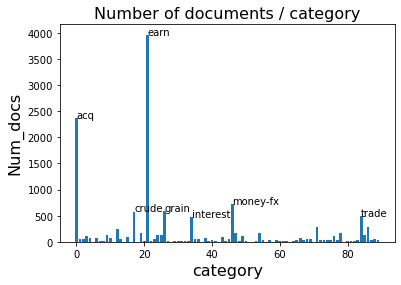

In [20]:
# make new dataframe from rows which num_docs >= 400 to annotate
df = data.query('Num_docs >= 400')

# bar plot with matplotlib in Python
plt.bar(data.index, data.Num_docs, alpha=1)   

# iterate through index
for i in df.index:                                      
    plt.annotate(data.iloc[i,0], (i,data.iloc[i,1]))    # add categories names to datapoints which are >= 400

# set x-axis label and specific size
plt.xlabel('category',size=16)                          
# set y-axis label and specific size
plt.ylabel('Num_docs',size=16)
# set plot title with specific size
plt.title('Number of documents / category',size=16)
# save the plot as PNG file with dpi=150
#plt.savefig('docs_per_category.png', dpi=150)
plt.show()

# 2. Construct the feature set using CountVectorizer of the training dataset so that the maximum size of the feature set is 100 and each word feature should be contained in at least 3 documents and in less than 70% of total documents to be considered. Use standard preprocessing and stopword list, with WordNet lemmatizer.

In [26]:
def preProcess(doc):
    WN_lemmatizer = WordNetLemmatizer()

    sentences = sent_tokenize(doc)
    Tokens = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = [WN_lemmatizer.lemmatize(word, pos="v") for word in words]
        
        #words = [word for word in words if word.isalpha() and word not in Stopwords] #get rid of numbers and Stopwords
        #words= [word for word in words if word.isalnum() and word not in Stopwords]
        Tokens.extend(words)
        
    return ' '.join(Tokens)

In [34]:
def BOW_model(corpus):
    BOW = CountVectorizer(preprocessor=preProcess, max_features = 100, stop_words = "english", min_df = 3, max_df = 0.7)    #max_df=0.8, min_df=0.2, )  in case you want to reduce the size of the dictionary, you can change the default values of max_de, min_def and other parameters
    BOW.fit(corpus)
    #X = BOW.transform(corpus)
    #X = BOW.fit_transform(corpus)
    return BOW

In [37]:
BOW_model(reuters.CorpusView.iterate_from(reuters,0))

AttributeError: 'CategorizedPlaintextCorpusReader' object has no attribute '_cache'

# 3. Use NaivesBayes classifier to generate the model and test it on the testing dataset. Output the accuracy and F1 measure of this classifier. Compare the result with Random Forest and linear SVM classifiers.


# 4. Show the results of this classifier when the total number of features varies as 1000, 1500, 2000, 2500, 3000, 3500, 4500, 5000.

# 5. Repeat 3) when a PCA (of 95% information preservation) is used to reduce the dimension of the feature space. 


# 6. Instead of CountVectorizer, use TfidfVectorizer to create the feature set as in 2) and test the classification accuracy and F1 measure of Naives’ Bayes classifier.


# 7. Use Word2vec to create a feature vector to each document by averaging over all word2vec representations of individual words constituting the document. Use this feature set to train the Naives’ Bayes classifier and output the accuracy, F1 measure and confusion matrix on testing data. 


# 8. Now we would like to tackle the discrepancy of the number of instances in training data among the various categories. For this purpose, create a new partition, where you remove the categories that contains very large number of instances and very low number of instances as compared to the rest of the categories. Repeat 3) and provide the results on the table. 

# 9. Similarly, use word2vec model to calculate the new performance on the testing data for the new set of categories in 8).

# 10. Now we would like to handle the data discrepancy in the class, we would like to perform data augmentation on the small size classes. For this purpose, for the classes, which contain small number of instances, write a script that allows you to duplicate the number of small samples at an order close to the average of other classes. Then repeat the process 3) and test whether an enhancement of the results on the testing data can be noticed.
 

# 11. Now we would like to test the influence of the multi-category documents on the classification. For this purpose, write a script, which scrutinizes the training set, so that every document, which is found to belong to more than one category in the training set is removed. Repeat 3) and word2vec model to evaluate the performance of the model on the test data, and discuss the contribution of this removal action. 

# 12. Use appropriate literature in order to comment on your findings. 